In [7]:
# Importing necesary packages
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# importing the data
data=pd.read_csv('/content/drive/MyDrive/forestfires.csv')
data

month  day  FFMC    DMC  ...  monthnov  monthoct  monthsep  size_category
0     mar  fri  86.2   26.2  ...         0         0         0          small
1     oct  tue  90.6   35.4  ...         0         1         0          small
2     oct  sat  90.6   43.7  ...         0         1         0          small
3     mar  fri  91.7   33.3  ...         0         0         0          small
4     mar  sun  89.3   51.3  ...         0         0         0          small
..    ...  ...   ...    ...  ...       ...       ...       ...            ...
512   aug  sun  81.6   56.7  ...         0         0         0          large
513   aug  sun  81.6   56.7  ...         0         0         0          large
514   aug  sun  81.6   56.7  ...         0         0         0          large
515   aug  sat  94.4  146.0  ...         0         0         0          small
516   nov  tue  79.5    3.0  ...         1         0         0          small

[517 rows x 31 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
# performing exploratory data analysis
# dropping unwanted coloumns
data=data.drop(data.iloc[:,11:30],axis=1)
data=data.drop(data.iloc[:,0:2],axis=1)
data

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00         small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00         small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00         small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...           ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44         large
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29         large
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16         large
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00         small
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         small

[517 rows x 10 columns]

In [12]:
#Print the duplicated rows
data[data.duplicated()]

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
53   92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00         small
100  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00         small
215  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66         large
303  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00         small
426  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00         small
461  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00         small
501  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00         small
508  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00         small

In [13]:
# removing the dupliicates
data.drop_duplicates()

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00         small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00         small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00         small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...           ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44         large
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29         large
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16         large
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00         small
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         small

[509 rows x 10 columns]

In [14]:
# checking for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FFMC      2.70
DMC      73.80
DC      276.20
ISI       4.30
temp      7.30
RH       20.00
wind      2.20
rain      0.00
area      6.57
dtype: float64


In [15]:
#removing the outliers
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

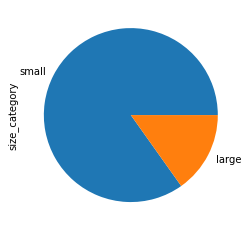

In [16]:
# pie-chart to know the  number of elements that belong to small and large
data.size_category.value_counts().plot(kind="pie") 

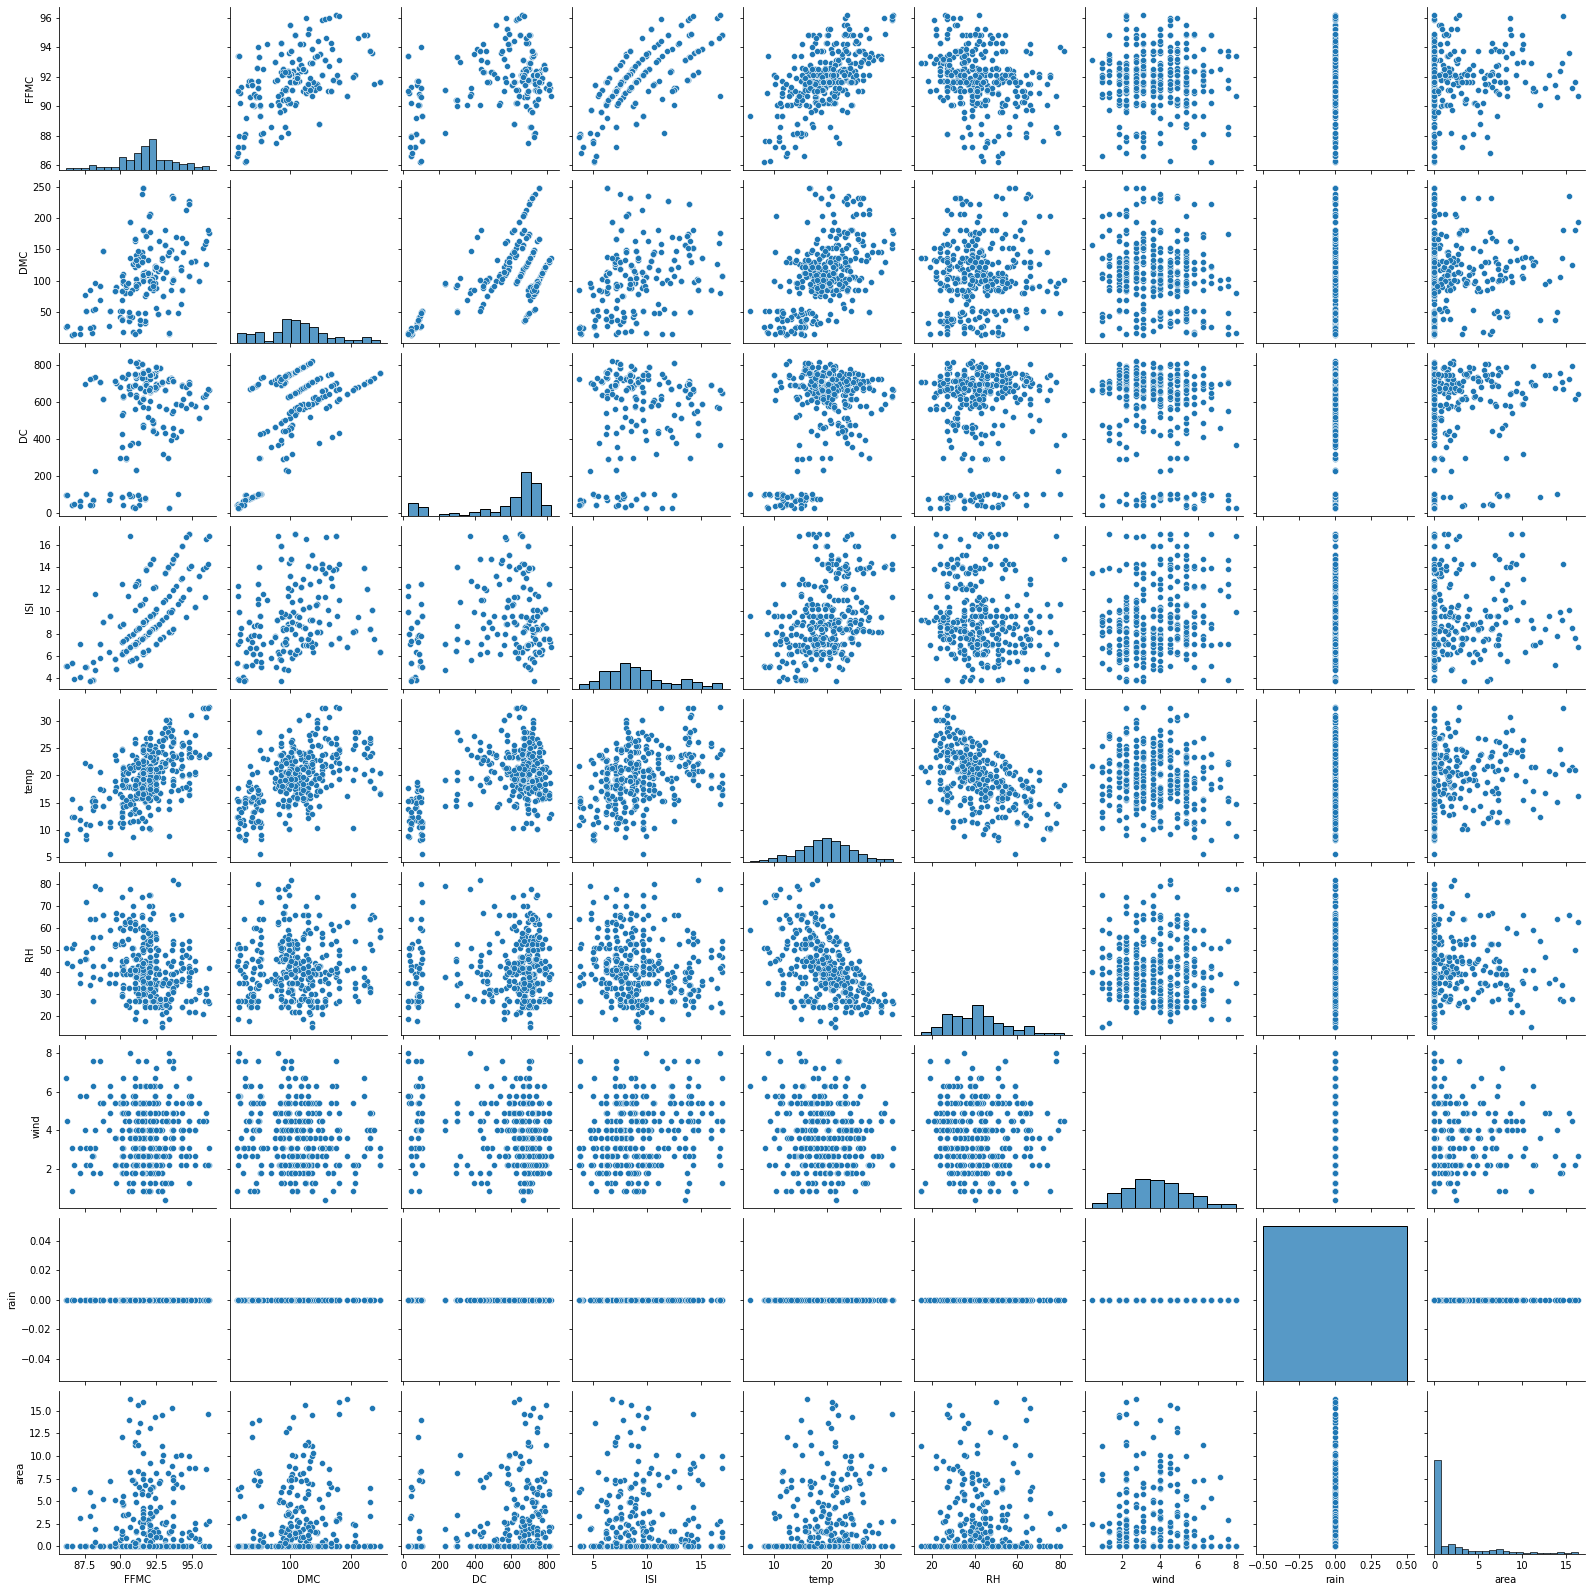

In [17]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [18]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 37.0MB/s 
     |████████████████████████████████| 1.1MB 48.1MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 3.1MB 47.0MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 296kB 49.9MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=14dcecc0615e633e7f270d15bef21c338c8e30d6fa2e04f205241d6ae941a2e8
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=2b2e867def2604d4352293773e329614f4b858ebb8c9310cef50b9d2fdd1f847
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing

In [19]:
#EDA using pandas profiling.
import pandas_profiling as pp 
report= pp.ProfileReport(data)
report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
## assigning specific values to string datasets
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data.iloc[:,9] = labelencoder.fit_transform(data.iloc[:,9])

In [22]:
# split into predictors and response
X = data.iloc[:,0:9] #predictors
y = data.iloc[:,9] #response

In [23]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

In [24]:
pd.DataFrame(X_standardized).describe() 

0             1  ...      7             8
count  3.560000e+02  3.560000e+02  ...  356.0  3.560000e+02
mean  -5.602884e-15 -3.430464e-17  ...    0.0 -8.482603e-17
std    1.001407e+00  1.001407e+00  ...    0.0  1.001407e+00
min   -3.046737e+00 -1.888302e+00  ...    0.0 -5.959545e-01
25%   -4.615577e-01 -5.112216e-01  ...    0.0 -5.959545e-01
50%    1.216626e-02 -6.496323e-02  ...    0.0 -5.959545e-01
75%    5.806350e-01  4.880716e-01  ...    0.0  1.827133e-01
max    2.367251e+00  2.616418e+00  ...    0.0  3.953471e+00

[8 rows x 9 columns]

In [25]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_standardized,y,test_size=0.3)

In [50]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam 
from keras.models import model_from_json

In [27]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [28]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.980, total=  19.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.900, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.960, total=   1.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.980, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.980, total=   1.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.960, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.960, total=   3.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   31.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.960, total=   3.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   34.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.960, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.980, total=   3.3s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.960, total=   4.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.920, total=   5.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.960, total=   5.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.980, total=   5.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.980, total=   5.9s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.820, total=   1.1s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.0min finished


In [29]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9639183521270752, using {'batch_size': 10, 'epochs': 50}
0.9599183678627015,0.030931574534201305 with: {'batch_size': 10, 'epochs': 10}
0.9639183521270752,0.00783674716949463 with: {'batch_size': 10, 'epochs': 50}
0.9599183678627015,0.02183486458266969 with: {'batch_size': 10, 'epochs': 100}
0.8835918426513671,0.09322878421844191 with: {'batch_size': 20, 'epochs': 10}
0.9599183559417724,0.012520441003075262 with: {'batch_size': 20, 'epochs': 50}
0.9519183516502381,0.027045436246171704 with: {'batch_size': 20, 'epochs': 100}
0.8755918383598328,0.08127161499244327 with: {'batch_size': 40, 'epochs': 10}
0.9599183678627015,0.030931574534201305 with: {'batch_size': 40, 'epochs': 50}
0.9599183678627015,0.02183486458266969 with: {'batch_size': 40, 'epochs': 100}


In [30]:
# Defining the model
from keras.layers import Dropout

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 9,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [31]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train) 


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.820, total=   1.4s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.740, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.840, total=   1.0s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.920, total=   1.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.898, total=   1.0s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.820, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.740, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.840, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.920, total=   1.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.898, total=   1.0s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.820, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.740, total=   1.0s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.840, total=   1.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.920, total=   1.0s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.898, total=   1.6s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.880, total=   1.1s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   49.2s finished


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9277551054954529, using {'neuron1': 16, 'neuron2': 8}
0.843591833114624,0.06339520553870177 with: {'neuron1': 4, 'neuron2': 2}
0.843591833114624,0.06339520553870177 with: {'neuron1': 4, 'neuron2': 4}
0.843591833114624,0.06339520553870177 with: {'neuron1': 4, 'neuron2': 8}
0.8635918378829956,0.06352384061052607 with: {'neuron1': 8, 'neuron2': 2}
0.8796734571456909,0.07024460461534557 with: {'neuron1': 8, 'neuron2': 4}
0.8836734533309937,0.05550600852107338 with: {'neuron1': 8, 'neuron2': 8}
0.8677550911903381,0.06972070039518344 with: {'neuron1': 16, 'neuron2': 2}
0.9197551131248474,0.021689727143917148 with: {'neuron1': 16, 'neuron2': 4}
0.9277551054954529,0.027025214681679722 with: {'neuron1': 16, 'neuron2': 8}


In [33]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 9,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [34]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=0.820, total=   2.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.740, total=   2.2s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.840, total=   2.2s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.920, total=   2.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.898, total=   2.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.820, total=   2.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.6s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.740, total=   2.7s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.3s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.840, total=   2.2s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.920, total=   2.2s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.7s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.898, total=   2.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.820, total=   2.0s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.740, total=   2.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.840, total=   2.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.920, total=   2.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.898, total=   2.2s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.980, total=   2.2s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.2min finished


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.979918372631073, using {'activation_function': 'tanh', 'init': 'uniform'}
0.843591833114624,0.06339520553870177 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.843591833114624,0.06339520553870177 with: {'activation_function': 'softmax', 'init': 'normal'}
0.843591833114624,0.06339520553870177 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9159183740615845,0.09062878897205623 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9319183826446533,0.09595931676928703 with: {'activation_function': 'relu', 'init': 'normal'}
0.843591833114624,0.06339520553870177 with: {'activation_function': 'relu', 'init': 'zero'}
0.979918372631073,0.012650171006579692 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9759183764457703,0.007960768724482401 with: {'activation_function': 'tanh', 'init': 'normal'}
0.843591833114624,0.06339520553870177 with: {'activation_function': 'tanh', 'init': 'zero'}
0.979918372631073,0.012650171006579692 with: {'activation_fu

In [ ]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 9,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(optimizer = adam,metrics = ['accuracy'])
    return 

In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.0, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.0, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.0, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.0, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.0, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV] .. dropout_rate=0.0, learning_rate=0.01, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


[CV] .. dropout_rate=0.0, learning_rate=0.01, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV] .. dropout_rate=0.0, learning_rate=0.01, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV] .. dropout_rate=0.0, learning_rate=0.01, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................
[CV] .. dropout_rate=0.0, learning_rate=0.01, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] ... dropout_rate=0.0, learning_rate=0.1, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] ... dropout_rate=0.0, learning_rate=0.1, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] ... dropout_rate=0.0, learning_rate=0.1, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ... dropout_rate=0.0, learning_rate=0.1, score=nan, total=   0.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] ... dropout_rate=0.0, learning_rate=0.1, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.1, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.1, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.1, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.1, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] . dropout_rate=0.1, learning_rate=0.001, score=nan, total=   0.0s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s finished


AttributeError: ignored

In [36]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 9,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Fitting the model

model.fit(x_train,y_train)



In [37]:
# Predicting using trained model

y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[15  0]
 [ 0 92]]


In [38]:
train_acc=round(model.score(x_train, y_train) * 100, 2)
train_acc

100.0

In [39]:
from sklearn.metrics import accuracy_score
test_acc=round(accuracy_score(y_test,y_predict)*100,2)
test_acc

100.0

In [40]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

In [41]:
# calculate AUC
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

AUC: 1.000


Text(0, 0.5, 'True Positive Rate')

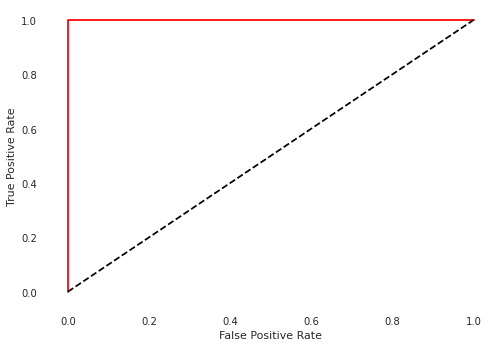

In [42]:
# Plotting of AUC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')